In [8]:
import numpy as np

# <center>MATH40006 Python Midterm Test 2020-21</center>

<center>One Hour</center>

<center>25 February 2021</center>

Show all code, output and diagrams, unless instructed otherwise. Where you are asked to test a function, full marks are only available if you show evidence of this testing. Function code should be appropriately commented, and each function should have at least a one-line docstring.

Please submit as a Jupyter notebook.

## Question 1 (20 marks)

(a) Import the NumPy module, and use it to set up two 1D arrays called `xvals` and `yvals`, 
each of which should consist of 200 equally-spaced floars between $0.01$ and $2.0$.

In [9]:
xvals = np.linspace(0.01, 2, 200)
yvals = np.linspace(0.01, 2, 200)

(b) Using the `meshgrid` function from NumPy, set up two 2D arrays called `x` and `y`, which should correspond respectively to the $x$- and $y$-coordinates of points on an equally-spaced $200\times 200$ lattice occupying the square $0.01\le x \le 2.0$, $0.01 \le y \le 2.0$.

In [10]:
x, y = np.meshgrid(xvals, yvals)

(c) Set up a 2D array called `z`, consisting of the values, on the $200\times200$ lattice, of the function
$$x + y - \log x - \log y.$$

In [11]:
z = x + y - np.log(x) - np.log(y)

(d) Set up 2D arrays called `dzdx` and `dzdy`, consisting of the values, on the $200\times200$ lattice, of the functions
$$1 - \frac{1}{x}\mbox{   and   }1- \frac{1}{y}$$
respectively (note that these correspond to the partial derivatives of $z$ with respect to $x$ and $y$).

In [12]:
dzdx = 1 - (1 / x)
dzdy = 1 - (1 / y)

(e) On the same pair of axes, show a streamplot of the vector field `(dzdy, -dzdx)`, in blue, together with a contour plot of `z`, in red. In the contour plot, set the `levels` keyword argument so that the contours shown correspond to $z=2.01,\,2.02,\,2.03,\,\dots,\,3.00$. Make the scales the same on both axes.

Comment briefly on what you see.

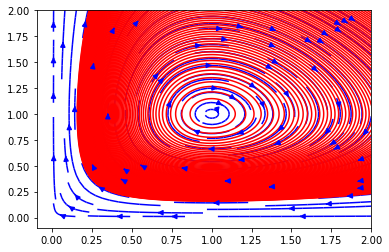

In [13]:
import matplotlib.pyplot as plt



plt.streamplot(x, y, dzdy, -dzdx, color = 'blue')

plt.contour(x, y, z, levels = np.arange(2.01, 3.01, 0.01), colors = 'red')

## Question 2 (30 marks)

The following is an iterative implementation of a function for calculating the $n$th line of Pascal's triangle, where $n$ is a non-negative integer.

In [14]:
def pascal_line1(n):
    """
    Calculates the nth line of Pascal's triangle
    """
    from numpy import array, append, flip
    
    line = array([1])
    
    # for loop
    for m in range(n):
        lengthened_line = append(line,0)
        line = lengthened_line + flip(lengthened_line)
        
    # return
    return line

(a) Test this function on a small number of varied cases, including (a) cases you can check by hand and (b) any edge cases you think necessary.

In [15]:
print(pascal_line1(10000))

[       1    10000 49995000 ... 49995000    10000        1]


In [16]:
print(pascal_line1(0))
print(pascal_line1(1))
print(pascal_line1(2))
print(pascal_line1(3))
print(pascal_line1(6))

[1]
[1 1]
[1 2 1]
[1 3 3 1]
[ 1  6 15 20 15  6  1]


In [17]:
import random as rnd
print(pascal_line1(rnd.randint(0,10000)))
print(pascal_line1(rnd.randint(0,10000)))
print(pascal_line1(rnd.randint(0,10000)))
print(pascal_line1(rnd.randint(0,10000)))
print(pascal_line1(rnd.randint(0,10000)))

[       1     4925 12125350 ... 12125350     4925        1]
[       1     6252 19540626 ... 19540626     6252        1]
[       1     7918 31343403 ... 31343403     7918        1]
[      1    2069 2139346 ... 2139346    2069       1]
[       1     7533 28369278 ... 28369278     7533        1]


(b) Write and test a <b>recursive</b> implementation of this algorithm, `pascal_line2`. Your function must not use a loop, but must instead call itself. As with `pascal_line1`, the sole argument should be a non-negative integer, and the function should return a 1D NumPy array.

In [18]:
def pascal_line2(n):
    """
    Calculates the nth line of Pascal's triangle
    """
    from numpy import array, append, flip
    
    #base case
    if n == 0:
        return array([1])
    
    #recursive step
    else:
        return append(pascal_line2(n-1), 0) + flip(append(pascal_line2(n-1), 0))

In [19]:
print(pascal_line2(100))

KeyboardInterrupt: 

In [20]:
print(pascal_line2(0))
print(pascal_line2(1))
print(pascal_line2(2))
print(pascal_line2(3))
print(pascal_line2(6))

[1]
[1 1]
[1 2 1]
[1 3 3 1]
[ 1  6 15 20 15  6  1]


In [24]:
import random as rnd
print(pascal_line2(rnd.randint(0,50)))
print(pascal_line2(rnd.randint(0,50)))
print(pascal_line2(rnd.randint(0,50)))
print(pascal_line2(rnd.randint(0,50)))
print(pascal_line2(rnd.randint(0,50)))

[   1   13   78  286  715 1287 1716 1716 1287  715  286   78   13    1]


KeyboardInterrupt: 

(c) Write and test a version of this function, `pascal_line3`, that uses core Python lists instead of arrays, and makes no use of NumPy functionality. Your function should be iterative: that is, it should use a loop.

In [19]:
def pascal_line3(n):
    """
    Calculates the nth line of Pascal's triangle
    """
    line = [1]
    
    # for loop
    for m in range(n):
        line.append(0)
        line = [line[i]+line[m+1-i] for i in range(m+2)]
        
    # return
    return line

In [20]:
print(pascal_line3(4))

[1, 4, 6, 4, 1]


In [16]:
print(pascal_line3(0))
print(pascal_line3(1))
print(pascal_line3(2))
print(pascal_line3(3))
print(pascal_line3(6))

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 6, 15, 20, 15, 6, 1]


In [ ]:
import random as rnd
print(pascal_line3(rnd.randint(0,10000)))
print(pascal_line3(rnd.randint(0,10000)))
print(pascal_line3(rnd.randint(0,10000)))
print(pascal_line3(rnd.randint(0,10000)))
print(pascal_line3(rnd.randint(0,10000)))

(d) Write and test a recursive version of this function, `pascal_line4`, that uses core Python lists instead of arrays, and makes no use of NumPy functionality. 

In [23]:
def pascal_line4(n):
    """
    Calculates the nth line of Pascal's triangle
    """
    
    #base case
    if n == 0:
        return [1]
    
    #recursive step
    else:
        return [(pascal_line4(n-1).append(0))[i]+(pascal_line4(n-1).append(0))[m+1-i] for i in range(n+2)]

In [25]:
print(pascal_line4(1))

TypeError: 'NoneType' object is not subscriptable

In [20]:
print(list(reversed([1, 0])))

[0, 1]


(e) Using the `time` function from the `time` module, or otherwise, time each of your iterative functions, `pascal_line1` and `pascal_line3`, on the task of calculating the $10 000$th (ten thousandth) line of Pascal's triangle. Comment briefly on your findings.